In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy import integrate

import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib widget

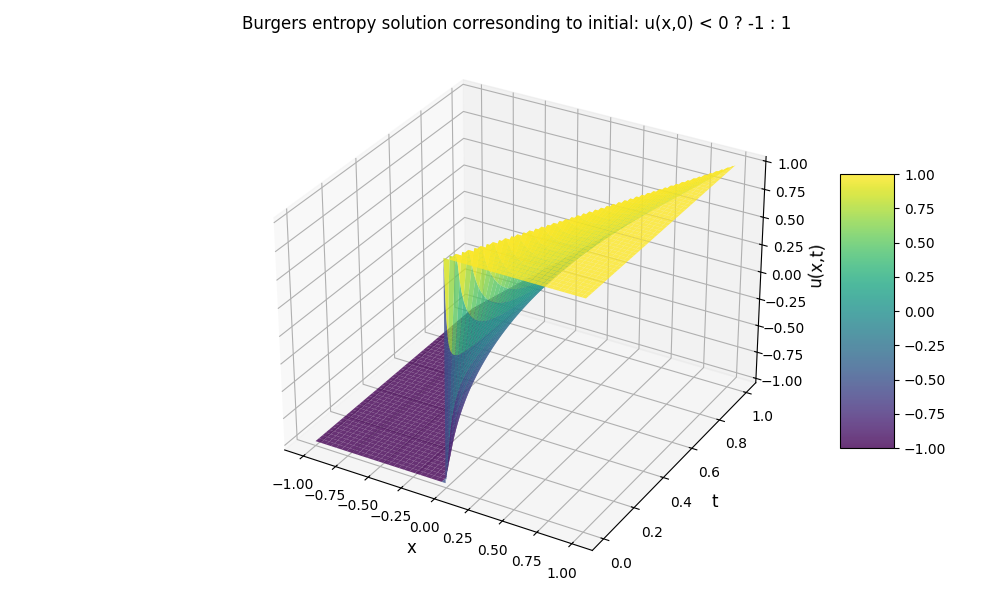

In [2]:
def piecewise_function(x, t):
    """
        u(x,t) = -1     if x < -t
        u(x,t) = x/t    if |x| <= t
        u(x,t) = 1      if x > t
    """
    # Create output array with same shape as input
    result = np.zeros_like(x)
    
    # Conditions
    condition1 = (x < -t)
    condition2 = ((-t <= x) & (x <= t))
    condition3 = (x > t)
    
    # Apply conditions
    result[condition1] = -1
    result[condition2] = x[condition2] / t[condition2]
    result[condition3] = 1
    
    return result

def create_grid(space_range=(-1, 1), time_range=(0, 1), space_points=200, time_points=100):

    x = np.linspace(space_range[0], space_range[1], space_points)
    t = np.linspace(time_range[0], time_range[1], time_points)
    X, T = np.meshgrid(x, t)
    return X, T

def plot_surface(X, T, U):
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X, T, U, cmap=cm.viridis, 
                          linewidth=0, antialiased=True, alpha=0.8)
    
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('t', fontsize=12)
    ax.set_zlabel('u(x,t)', fontsize=12)
    ax.set_title("Burgers entropy solution corresonding to initial: u(x,0) < 0 ? -1 : 1")
    
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.tight_layout()
    plt.show()

# Create the grid
X, T = create_grid(space_range=(-1, 1), time_range=(0, 1))
    
# Calculate the function values
U = piecewise_function(X, T)
    
# Plot the surface
plot_surface(X, T, U)